In [265]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

## cybersecurity data set

In [266]:
cyber_df = pd.read_csv('cybersecurity_intrusion_data.csv')
cyber_df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [267]:
display(cyber_df.info())
print('\n\n')
display(cyber_df.isna().sum()/len(cyber_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None

session_id             0.000000
network_packet_size    0.000000
protocol_type          0.000000
login_attempts         0.000000
session_duration       0.000000
encryption_used        0.206144
ip_reputation_score    0.000000
failed_logins          0.000000
browser_type           0.000000
unusual_time_access    0.000000
attack_detected        0.000000
dtype: float64

In [268]:
display(cyber_df.duplicated().sum())
display(cyber_df['protocol_type'].value_counts())
display(cyber_df['browser_type'].value_counts())


np.int64(0)

protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

In [269]:
protcol_type_encoder = LabelEncoder()
browser_type_encoder = LabelEncoder()
cyber_df['protocol_type_en'] = protcol_type_encoder.fit_transform(cyber_df['protocol_type'])
cyber_df['browser_type_en'] = browser_type_encoder.fit_transform(cyber_df['browser_type'])

In [270]:
feature_cols_cyber = list(cyber_df.drop(['session_id', 'encryption_used', 'attack_detected', 'browser_type', 'protocol_type'], axis=1).columns)
feature_cols_cyber

['network_packet_size',
 'login_attempts',
 'session_duration',
 'ip_reputation_score',
 'failed_logins',
 'unusual_time_access',
 'protocol_type_en',
 'browser_type_en']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(cyber_df[feature_cols_cyber], 
                                                    cyber_df['attack_detected'],
                                                    train_size=0.8,
                                                    random_state=42)

### Decision Tree model

In [272]:
mdl_detected_attacks = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
mdl_detected_attacks.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [273]:
mdl_detected_attacks.score(X_test, y_test)

0.8972746331236897

In [274]:
print(classification_report(mdl_detected_attacks.predict(X_test), y_test))
confusion_matrix(mdl_detected_attacks.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1238
           1       0.77      1.00      0.87       670

    accuracy                           0.90      1908
   macro avg       0.89      0.92      0.89      1908
weighted avg       0.92      0.90      0.90      1908



array([[1042,  196],
       [   0,  670]])

### Logistic Regression Model

<Axes: >

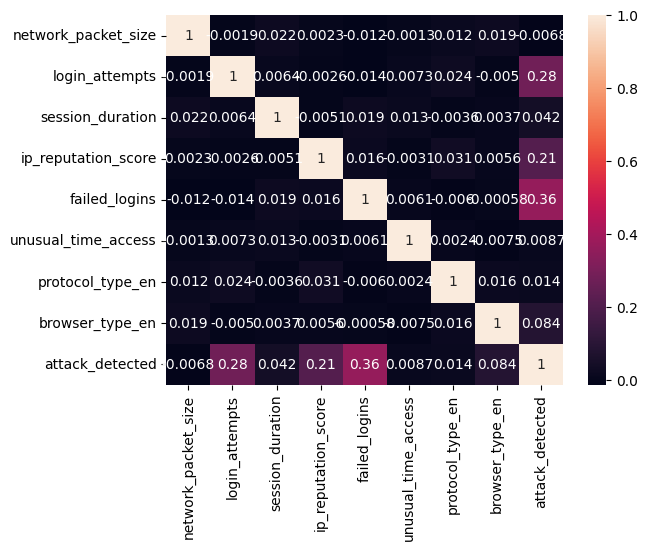

In [275]:
sns.heatmap(cyber_df[feature_cols_cyber + ['attack_detected']].corr(), annot=True)

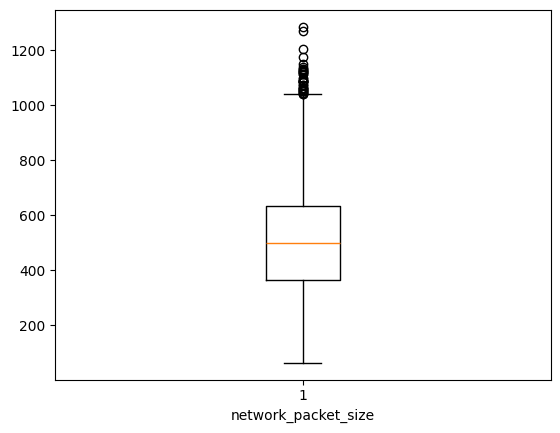

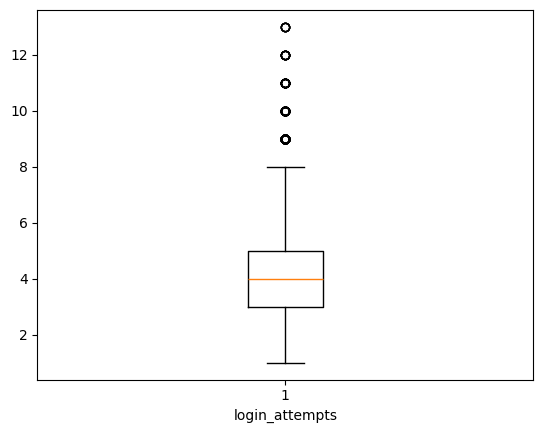

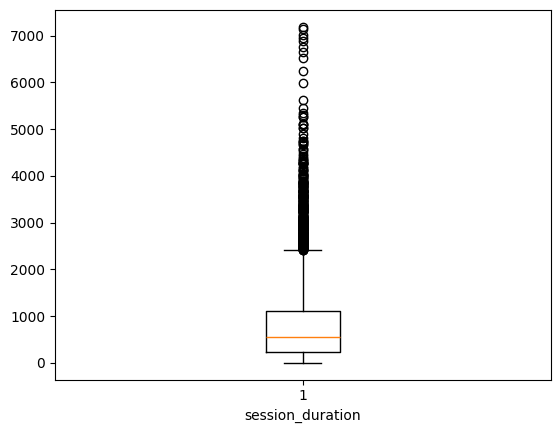

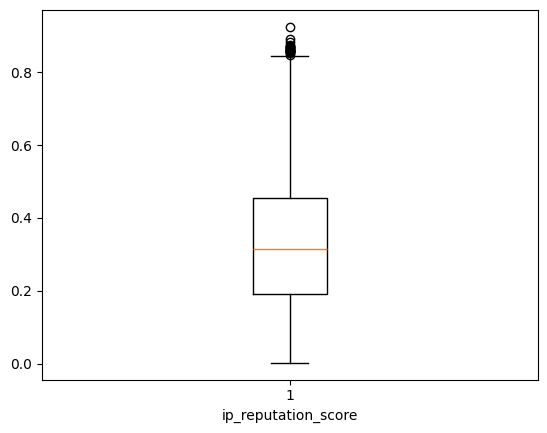

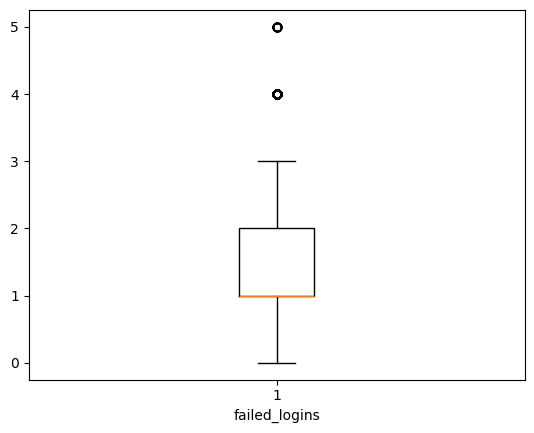

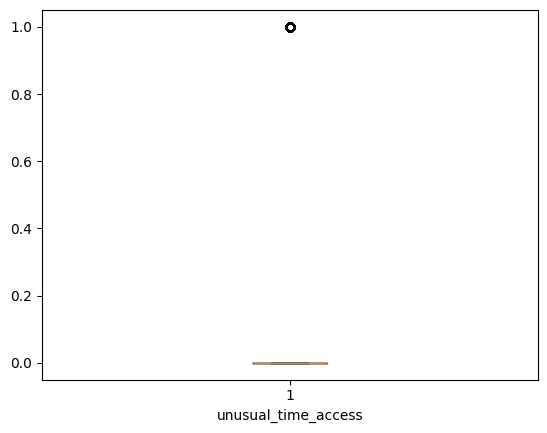

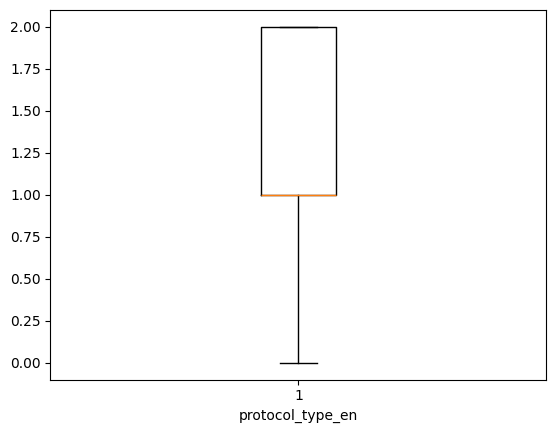

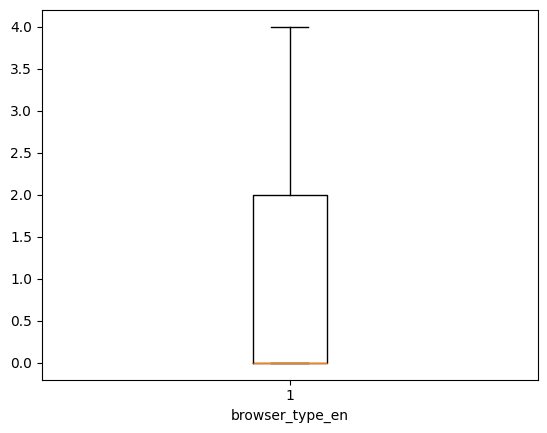

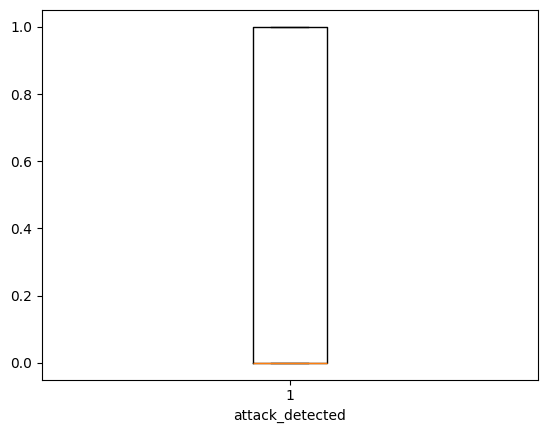

In [276]:
for col in (feature_cols_cyber + ['attack_detected']):
    plt.boxplot(cyber_df[col])
    plt.xlabel(col)
    plt.show()

In [277]:
#cyber_df_cleaned = cyber_df.copy()
for col in feature_cols_cyber:
    iqr_cyber = cyber_df[col].quantile(0.75) - cyber_df[col].quantile(0.25)
    min_val_cyber = cyber_df[col].quantile(0.25) - 1.5 * iqr_cyber
    max_val_cyber = cyber_df[col].quantile(0.75) + 1.5 * iqr_cyber
    l1 = cyber_df[col]>=min_val_cyber 
    l2 = cyber_df[col]<=max_val_cyber
    cyber_df = cyber_df[np.logical_and(l1, l2)]

In [278]:
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(cyber_df[feature_cols_cyber],
                                                                            cyber_df['attack_detected'],
                                                                            test_size=0.2,
                                                                            random_state=84) 

In [279]:
mdl_logit_cyber = LogisticRegression()
mdl_logit_cyber.fit(X_train_logit, y_train_logit)
mdl_logit_cyber.score(X_test_logit, y_test_logit)

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7361206305688828

### SVC

In [280]:
support_mdl_cyber = SVC(C=0.88,degree=5)
support_mdl_cyber

,C,0.88
,kernel,'rbf'
,degree,5
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [281]:
support_mdl_cyber.fit(X_train_logit, y_train_logit)
support_mdl_cyber.score(X_test_logit, y_test_logit)

0.5901302261823167

## Drug data set

In [282]:
drug_df = pd.read_csv('drug200.csv')
display(drug_df.head())
display(drug_df.info())
display(drug_df.isna().sum())
display(drug_df.duplicated().sum())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


None

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

np.int64(0)

In [283]:
display(drug_df['BP'].value_counts())
display(drug_df['Cholesterol'].value_counts())

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [284]:
drug_sex_encoder = LabelEncoder()
drug_BP_encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
cholesterol_encoder = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
drug_df['Sex'] = drug_sex_encoder.fit_transform(drug_df['Sex'])
drug_df['BP_n'] = drug_BP_encoder.fit_transform(drug_df[['BP']])
drug_df['Cholesterol_en'] = cholesterol_encoder.fit_transform(drug_df[['Cholesterol']])

In [285]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_n,Cholesterol_en
0,23,0,HIGH,HIGH,25.355,drugY,2.0,1.0
1,47,1,LOW,HIGH,13.093,drugC,0.0,1.0
2,47,1,LOW,HIGH,10.114,drugC,0.0,1.0
3,28,0,NORMAL,HIGH,7.798,drugX,1.0,1.0
4,61,0,LOW,HIGH,18.043,drugY,0.0,1.0


In [ ]:
X = drug_df[['Sex', 'Age', 'Cholesterol_en', 'BP_n', 'Na_to_K']]
y = drug_df['Drug']
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X,y,test_size=0.2,random_state=42)

### DecisionTree

In [290]:
mdl_drug = DecisionTreeClassifier()
mdl_drug.fit(X_train_drug, y_train_drug)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [291]:
print(classification_report(mdl_drug.predict(X_test_drug), y_test_drug))
confusion_matrix(mdl_drug.predict(X_test_drug), y_test_drug)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

### Logistic

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

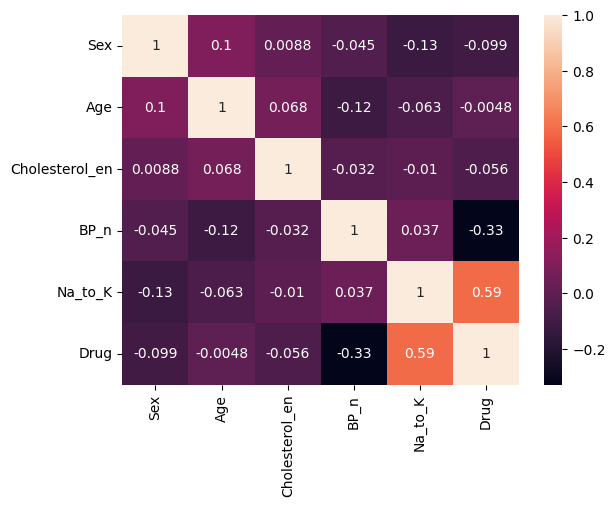

In [296]:
drug_df_cpy = drug_df.copy()
drug_cpy_encoder = LabelEncoder()
drug_df_cpy['Drug'] = drug_cpy_encoder.fit_transform(drug_df[['Drug']])
sns.heatmap(drug_df_cpy[['Sex', 'Age', 'Cholesterol_en', 'BP_n', 'Na_to_K','Drug']].corr(), annot=True)

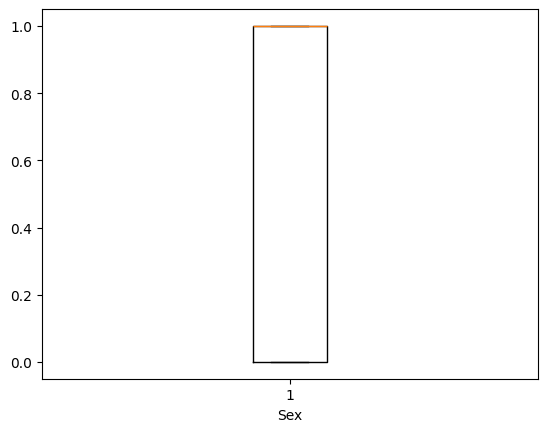

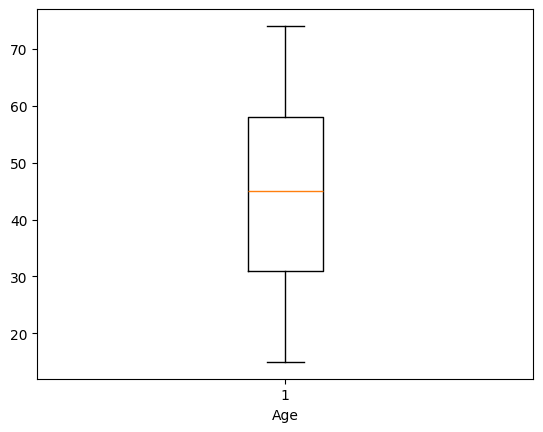

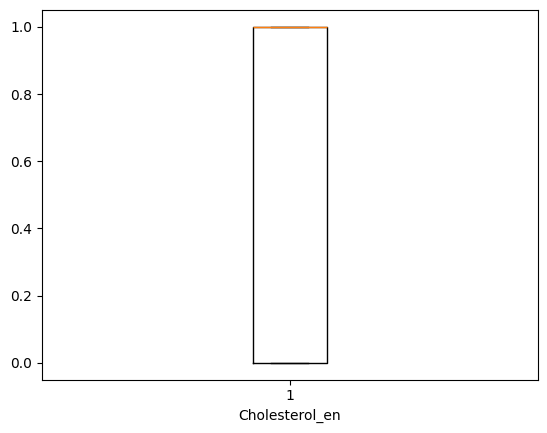

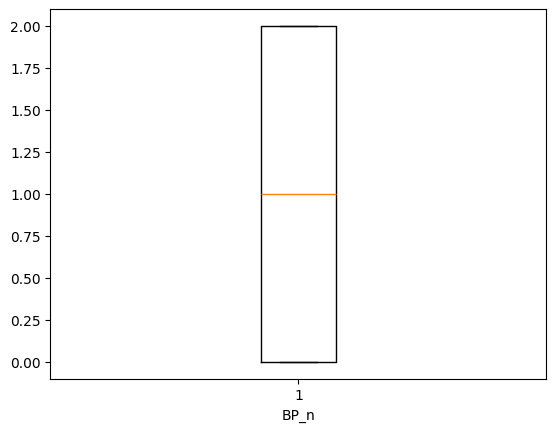

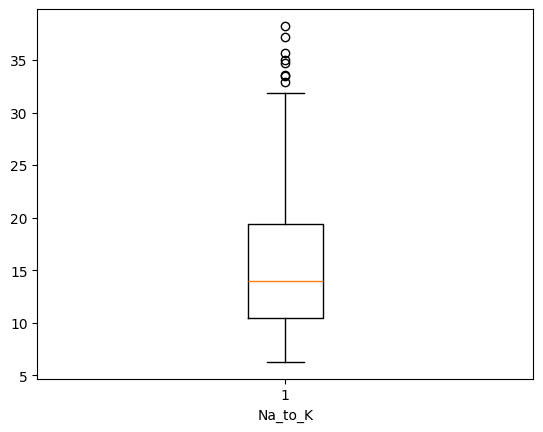

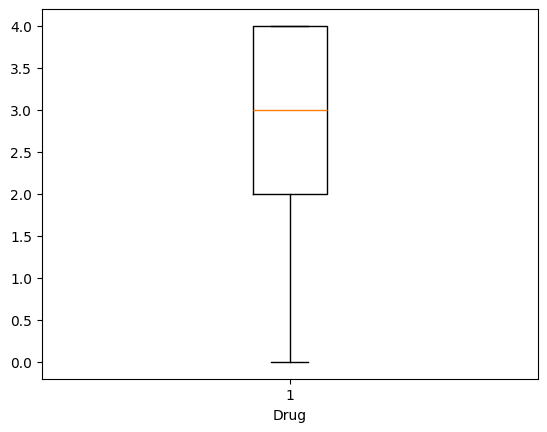

In [297]:
for col in ['Sex', 'Age', 'Cholesterol_en', 'BP_n', 'Na_to_K','Drug']:
    plt.boxplot(drug_df_cpy[col])
    plt.xlabel(col)
    plt.show()

In [299]:
drug_logit_mdl = LogisticRegression()
drug_logit_mdl.fit(X_train_drug, y_train_drug)
drug_logit_mdl.score(X_test_drug, y_test_drug)

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

In [300]:
confusion_matrix(drug_logit_mdl.predict(X_test_drug), y_test_drug)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  4, 11,  0],
       [ 0,  0,  0,  0, 15]])

### SVC

In [355]:
iqr_drug = drug_df_cpy['Na_to_K'].quantile(0.75) - drug_df_cpy['Na_to_K'].quantile(0.25)
min_val_drug =  drug_df_cpy['Na_to_K'].quantile(0.25) - 1.5* iqr_drug
max_val_drug =  drug_df_cpy['Na_to_K'].quantile(0.75) + 1.5* iqr_drug
cond_drug = np.logical_and(drug_df_cpy['Na_to_K'] > min_val_drug, drug_df_cpy['Na_to_K'] < max_val_drug)
drug_df_cpy = drug_df_cpy[cond_drug]

In [356]:
X_train_svc_drug, X_test_svc_drug, y_train_svc_drug, y_test_svc_drug = train_test_split(drug_df_cpy[['Sex', 'Age', 'Cholesterol_en', 'BP_n', 'Na_to_K']]
                                                                                        ,drug_df_cpy['Drug']
                                                                                        ,random_state=42
                                                                                        ,test_size=0.2)

In [375]:
drug_svc_mdl = SVC(kernel='linear')
drug_svc_mdl

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [376]:
drug_svc_mdl.fit(X_train_svc_drug, y_train_svc_drug)
drug_svc_mdl.score(X_test_svc_drug, y_test_svc_drug)

0.9743589743589743

In [377]:
print(classification_report(drug_svc_mdl.predict(X_test_svc_drug), y_test_svc_drug))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        13
           4       0.92      1.00      0.96        12

    accuracy                           0.97        39
   macro avg       0.98      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



## Weather Data Set 

In [386]:
weather_df = pd.read_csv('weather_forecast_data.csv')
display(weather_df.head())
display(weather_df.info())
display(weather_df.isna().sum())
display(weather_df.duplicated().sum())

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

np.int64(0)

In [387]:
X_weather = weather_df.drop('Rain', axis=1)
y_weather = weather_df['Rain']

In [388]:
X_train_weather , X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, 
                                                                                    y_weather, 
                                                                                    test_size=0.2,
                                                                                    random_state=42)

In [389]:
mdl_weather = DecisionTreeClassifier()
mdl_weather.fit(X_train_weather, y_train_weather)
mdl_weather.score(X_test_weather, y_test_weather)

1.0

In [390]:
print(classification_report(mdl_weather.predict(X_test_weather), y_test_weather))
confusion_matrix(mdl_weather.predict(X_test_weather), y_test_weather)

              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       443
        rain       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



array([[443,   0],
       [  0,  57]])

### Logistic Regression

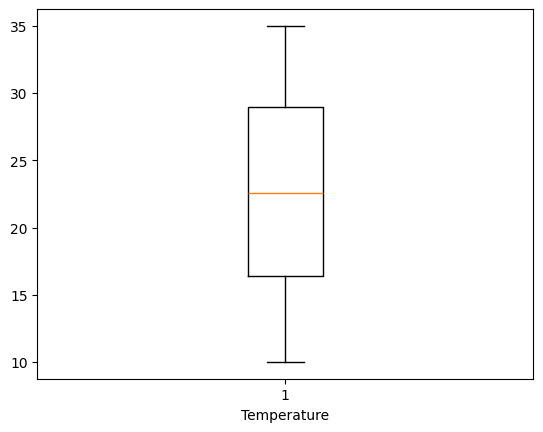

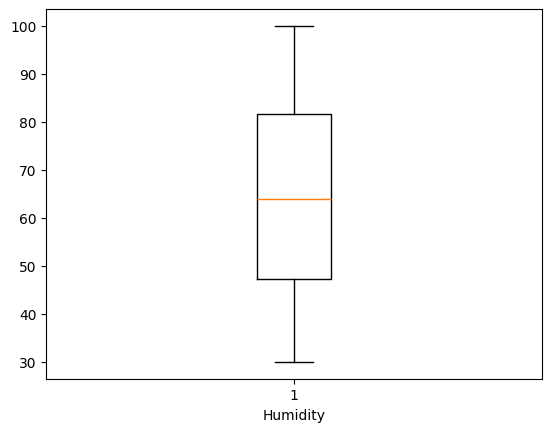

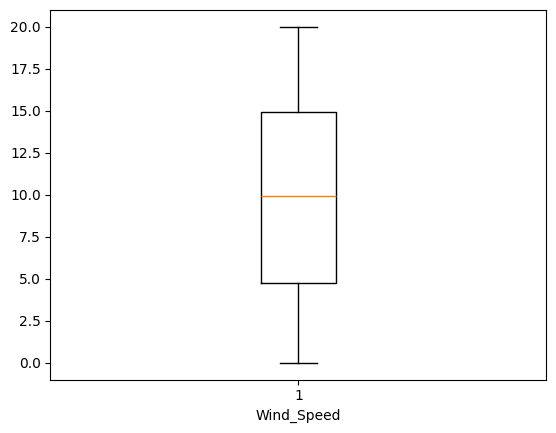

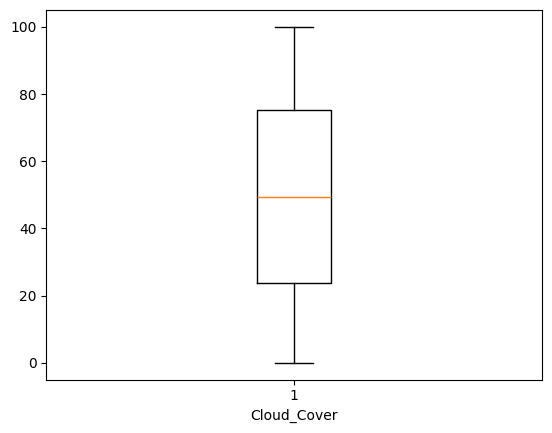

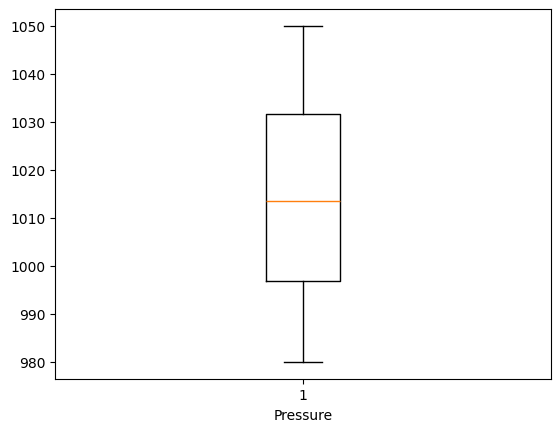

In [379]:
for col in X_weather.columns:
    plt.boxplot(weather_df[col])
    plt.xlabel(col)
    plt.show()

In [394]:
weather_df['Rain_n'] = LabelEncoder().fit_transform(weather_df['Rain'])
weather_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Rain_n
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,0
...,...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain,0


<Axes: >

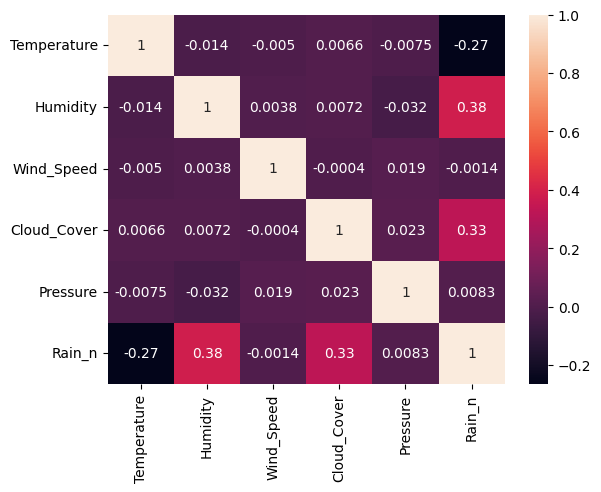

In [395]:
lol = weather_df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure','Rain_n']]
sns.heatmap(lol.corr(), annot=True)

In [397]:
mdl_logit_weather = LogisticRegression()
mdl_logit_weather.fit(X_train_weather, y_train_weather)
mdl_logit_weather.score(X_test_weather, y_test_weather)

0.932

### SVC

In [400]:
weather_svc_mdl = SVC(kernel='linear')
weather_svc_mdl.fit(X_train_weather, y_train_weather)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [401]:
weather_svc_mdl.score(X_test_weather, y_test_weather)

0.928